In [10]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [11]:
# 2. LOAD DATASET

df = pd.read_csv("paysim1.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# Remove unnecessary columns
df = df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

# Encode transaction type
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Check missing values
df.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [13]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
#Linear regression model1

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

# Convert predictions to 0 or 1
lr_pred_class = (lr_pred > 0.5).astype(int)

print("Linear Regression Accuracy:",
      accuracy_score(y_test, lr_pred_class))

Linear Regression Accuracy: 0.9988526738984883


In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:",
      accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.999711596795031


In [16]:
# comparison

print("Linear Regression Report:")
print(classification_report(y_test, lr_pred_class))

print("Decision Tree Report:")
print(classification_report(y_test, dt_pred))

Linear Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.10      0.18      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.55      0.59   1272524
weighted avg       1.00      1.00      1.00   1272524

Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.89      0.88      0.89      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



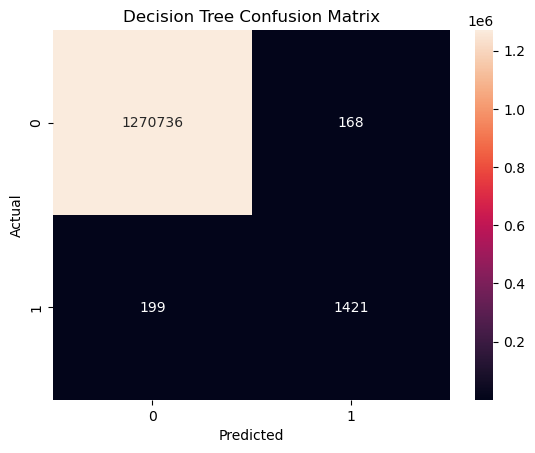

In [17]:
#confusion matrix
cm = confusion_matrix(y_test, dt_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

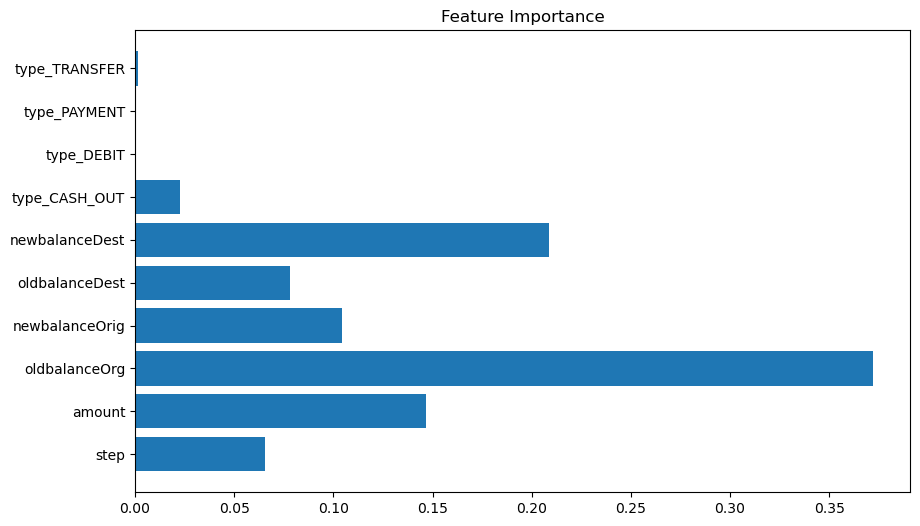

In [18]:
# feature importance
importances = dt.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

In [19]:
# 8. SAVE BEST MODEL
joblib.dump(dt, "model.pkl")
print("Model saved successfully")

Model saved successfully
